/home/dinu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dinu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/dinu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.0245089530945
0.580661322645


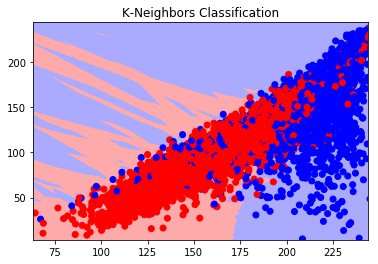

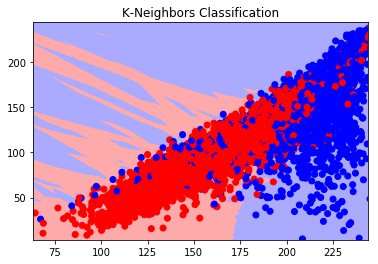

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import pandas as pd



df=pd.read_csv('epi_stroma_data.csv')#load csv file to model
df1=df.fillna(df)#removes row inclue with null value cell
y=df1.drop(['Mean.Layer.1','Mean.Layer.2','Mean.Layer.3','Standard.deviation.Layer.1','Standard.deviation.Layer.2',
           'Standard.deviation.Layer.3','Skewness.Layer.1','Skewness.Layer.2','Skewness.Layer.3','Ratio.Layer.1',
           'Ratio.Layer.2','Ratio.Layer.3','Min..pixel.value.Layer.1','Min..pixel.value.Layer.2','Min..pixel.value.Layer.3',
           'Max..pixel.value.Layer.1','Max..pixel.value.Layer.2','Max..pixel.value.Layer.3','Mean.of.inner.border.Layer.1',
           'Mean.of.inner.border.Layer.2','Mean.of.inner.border.Layer.3','Mean.of.outer.border.Layer.1','Mean.of.outer.border.Layer.2',
           'Mean.of.outer.border.Layer.3','Border.Contrast.Layer.1','Border.Contrast.Layer.2','Border.Contrast.Layer.3',
           'Contrast.to.neighbor.pixels.Layer.1..3.','Contrast.to.neighbor.pixels.Layer.2..3.',	'Contrast.to.neighbor.pixels.Layer.3..3.',
           'Edge.Contrast.of.neighbor.pixels..Prototype..Layer.1..3.','Edge.Contrast.of.neighbor.pixels..Prototype..Layer.2..3.',
           'Edge.Contrast.of.neighbor.pixels..Prototype..Layer.3..3.','StdDev..to.neighbor.pixels.Layer.1..3.',
           'StdDev..to.neighbor.pixels.Layer.2..3.','StdDev..to.neighbor.pixels.Layer.3..3.','Circular.Mean.Layer.1..R1..User..3..R2..Same...R1...border.',
           'Circular.Mean.Layer.2..R1..User..3..R2..Same...R1...border.','Circular.Mean.Layer.3..R1..User..3..R2..Same...R1...border.',
           'Circular.StdDev.Layer.1..R1..User..3..R2..Same...R1...border.',	'Circular.StdDev.Layer.2..R1..User..3..R2..Same...R1...border.',
           'Circular.StdDev.Layer.3..R1..User..3..R2..Same...R1...border.','Circular.StdDev.Mean.Layer.1..R1..User..3..R2..Same...R1...border.',
           'Circular.StdDev.Mean.Layer.2..R1..User..3..R2..Same...R1...border.','Circular.StdDev.Mean.Layer.3..R1..User..3..R2..Same...R1...border.',
           'Mean.Diff..to.neighbors.Layer.1..0.','Mean.Diff..to.neighbors.Layer.2..0.',	'Mean.Diff..to.neighbors.Layer.3..0.','Mean.Diff..to.neighbors..abs..Layer.1..0.',
           'Mean.Diff..to.neighbors..abs..Layer.2..0.','Mean.Diff..to.neighbors..abs..Layer.3..0.',
           'Rel..border.to.brighter.objects.Layer.1','Rel..border.to.brighter.objects.Layer.2','Rel..border.to.brighter.objects.Layer.3','Mean.diff..to.scene.Layer.1',
           'Mean.diff..to.scene.Layer.2','Mean.diff..to.scene.Layer.3','Ratio.to.scene.Layer.1','Ratio.to.scene.Layer.2','Ratio.to.scene.Layer.3',
           'HSI.Transformation.Hue.R.Layer.1.G.Layer.2.B.Layer.3.','Area..Pxl.','Border.length..Pxl.','Length..mu_m.',
           'Length.Width','Number.of.pixels','Rel..Border.to.Image.Border','Volume..Pxl.','Width..mu_m.','Asymmetry','Border.index',
           'Compactness','Density','Elliptic.Fit','Radius.of.largest.enclosed.ellipse','Radius.of.smallest.enclosing.ellipse',
           'Rectangular.Fit','Roundness','Shape.index','Area..excluding.inner.polygons...Pxl.','Area..including.inner.polygons...Pxl.',
           'Average.length.of.edges..polygon...Pxl.','Compactness..polygon.','Length.of.longest.edge..polygon...Pxl.','Number.of.edges..polygon.',
           'Number.of.inner.objects..polygon.','Perimeter..polygon...Pxl.','Stddev.of.length.of.edges..polygon...Pxl.',
           'Mean.of.sub.objects..stddev.Layer.1..1.','Area.of.sub.objects..mean..1...Pxl.','Area.of.sub.objects..stddev..1...Pxl.',
           'Density.of.sub.objects..mean..1.','Density.of.sub.objects..stddev..1.','Asymmetry.of.sub.objects..mean..1.','Asymmetry.of.sub.objects..stddev..1.',
           'Direction.of.sub.objects..mean..1.','Direction.of.sub.objects..stddev..1.','GLCM.Homogeneity..quick.8.11..Layer.1..all.dir..',
           'GLCM.Contrast..quick.8.11..Layer.1..all.dir..','GLCM.Dissimilarity..quick.8.11..Layer.1..all.dir..','GLCM.Entropy..quick.8.11..Layer.1..all.dir..',
           'GLCM.Ang..2nd.moment..quick.8.11..Layer.1..all.dir..','GLCM.Mean..quick.8.11..Layer.1..all.dir..','GLCM.StdDev..quick.8.11..Layer.1..all.dir..',
           'GLCM.Correlation..quick.8.11..Layer.1..all.dir..','Number.of.sub.objects.Nucleus..1.','Number.of.sub.objects.Dark..1.',
           'Area.of.sub.objects.Nucleus..1...Pxl.','Area.of.sub.objects.Dark..1...Pxl.','Rel..area.of.sub.objects.Nucleus..1.','Rel..area.of.sub.objects.Dark..1.',
           'Rel..area.of.sub.objects.unclassified..1.'],axis=1)#select target data set from csv file
X=df1.drop(['EpiOrStroma'],axis=1)#select two dimentional array

X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=4)# divide data set into taining and testing
import time

start =time.time()
knc=KNeighborsClassifier()#create obtect from kNN
knc.fit(X_train,y_train)#trainng the data set
print(time.time()-start)
y_pre=knc.predict(X_test)#input testing data set to predict 
#print y_pre
print(metrics.accuracy_score(y_test,y_pre))#calculate accuracy 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
n_neighbors = 5
h=0.2
#X1=X.values
X_plot =X.values[:, :2]#select first two coloum data from X matrics

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier()
    clf.fit(X_plot, y.values)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 1].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K-Neighbors Classification")

plt.show()